In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
# Data set - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [21]:
from google.colab import files
uploaded = files .upload()

Saving cardio.csv to cardio (1).csv


In [22]:
df = pd.read_csv('cardio.csv',sep=';')
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [23]:
df.shape

(70000, 13)

In [24]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [25]:
df.isnull().values.any()

False

In [26]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [28]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

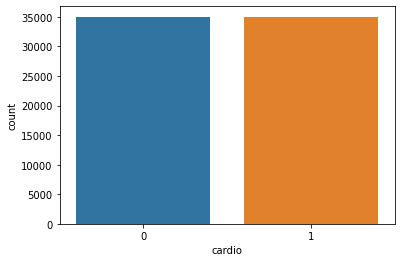

In [29]:
sns.countplot(df['cardio'])

In [30]:
df.age.unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926])

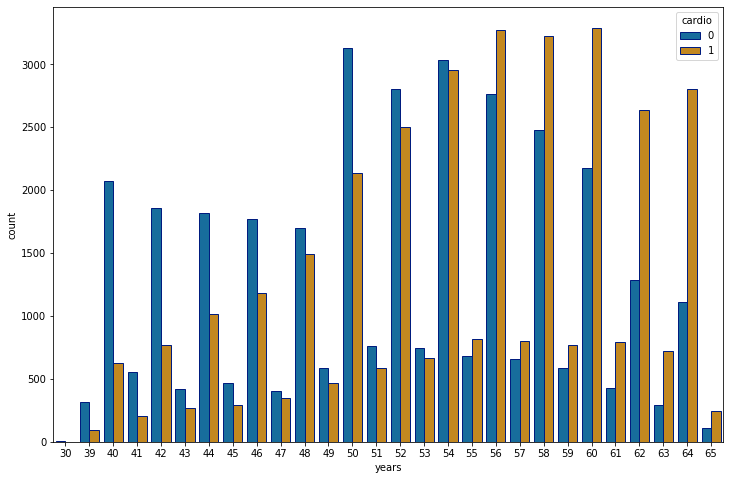

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

sns.countplot(x = 'years', hue='cardio',data=df, palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
plt.show()

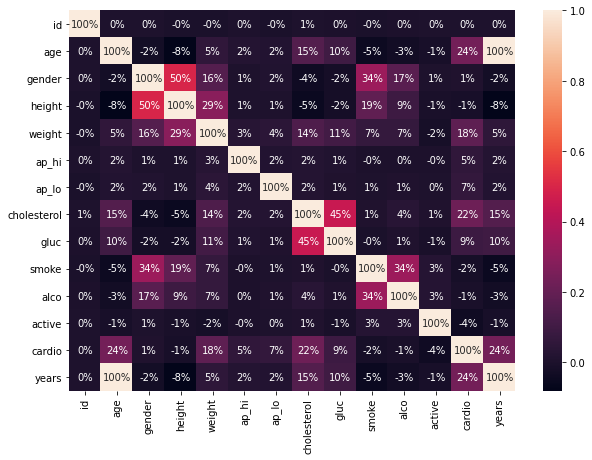

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True,fmt = '.0%')

In [34]:
df = df.drop('years',axis=1)

In [35]:
df = df.drop('id',axis=1)

In [37]:
x =df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy',random_state=1)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
prediction = forest.predict(x_test)

In [42]:
forest.score(x_train,y_train)

0.9799809523809524

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(y_test,prediction)
cm

array([[6501, 2108],
       [3091, 5800]])

In [45]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.68      0.76      0.71      8609\n           1       0.73      0.65      0.69      8891\n\n    accuracy                           0.70     17500\n   macro avg       0.71      0.70      0.70     17500\nweighted avg       0.71      0.70      0.70     17500\n'

In [47]:
accuracy_score(y_test,prediction)

0.7029142857142857